(1, 3, 3, 1)


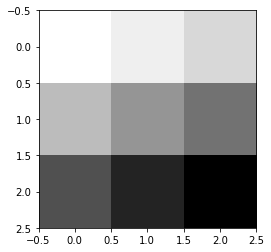

In [2]:
# 1. Convolutioin: 이미지 벡터에 Filter를 Stride만큼 움직여 가면서 각각 한개의 값을 뽑아냄 
# 2. Subsampling
# ...
# 3. Fully Connected(classification, regression...)
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Immage만들기
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')

# Simple convolution layer

conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


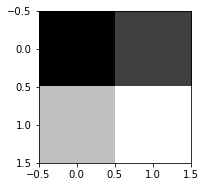

In [3]:
# filter: 2, 2, 1: 색의 수, 1: 필터의 개수
# stride: 1*1
weight = tf.constant([[[[1.]], [[1.]]], 
                       [[[1.]], [[1.]]]])
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2, 2), cmap='gray')

# Simple convolution layer - Padding: SAME
- 입력의 size와 출력의 size가 같게 한다
![simple_convolutional_layer_padding_same](./images/simple_convolutional_layer_padding_same.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


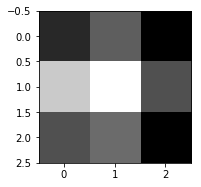

In [4]:
# filter: (2, 2, 1), 1: 필터의 개수
# stride: 1*1
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]], 
                       [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d_same = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d_same.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

# 3 filters (2, 2, 1, 3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


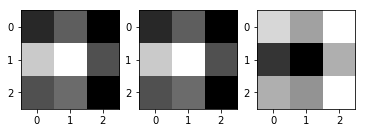

In [5]:
# filter: (2, 2, 1), 3: 필터의 개수
# stride: 1*1
print("image.shape", image.shape)
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]], 
                       [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)
conv2d_same = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d_same.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

# Max Pooling

![max_pooling](./images/max_pooling.png)

In [32]:
# Max Pooling: 주어진 이미지를 filter, strides, padding만 정해주면 알아서 해줌
image = np.array([[[[4], [3]]], [[[2], [1]]]], dtype=np.float32)
# SAME: 입력과 출력 사이즈가 같게 패딩
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(2, 1, 2, 1)
[[[[ 4.]
   [ 3.]]]


 [[[ 2.]
   [ 1.]]]]


# MNIST image loading

In [8]:
# 데이터로딩
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


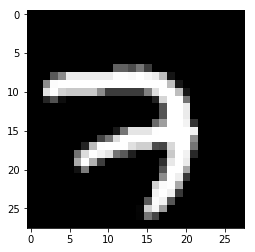

In [9]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


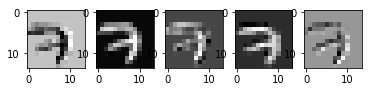

In [10]:
sess = tf.InteractiveSession()
# 28x28이미지, 색 1개, 이미지의 개수 -1: 알아서 계산해
img = img.reshape(-1, 28, 28, 1)
# color의 개수에 신경쓰면됨, filter 3x3, filter 개수 5개
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# stride 2 x 2, 
# SAME: stride가 1x1의 기준으로는 사이즈가 input 이미지의 사이즈와 같게 만든다
#       stride가 2x2이기 때문에 사이즈가 input 이미지의 사이즈에 1/2이 된다.
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
# 그림을 출력한다.
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

# MNIST Max Pooling

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


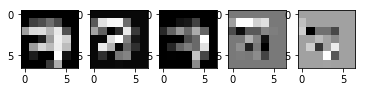

In [11]:
# Max Pooling
# stirde 2, 이미지의 사이즈가 14 -> 7
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
# 그림을 출력한다.
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')